In [1]:
import numpy as np
import matplotlib.pyplot as plt

Slope: 76.34453781512613 Offset: 10.995798319326944


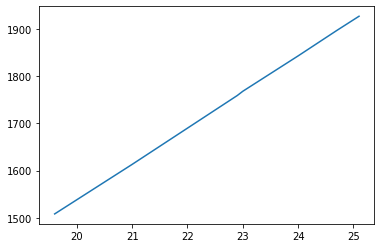

In [28]:
data = np.array([
  [23.0,0x6e8],
  [22.9,0x6df],
  [24,0x733],
  [25.1,0x787],
  [24.7,0x769],
  [21.0,0x64d],
  [19.6,0x5e4],
])

data = np.sort(data, axis=0)
plt.plot(data[:,0], data[:,1])

A = np.vstack([data[:,0], np.ones(len(data))]).T
slope, yint = np.linalg.lstsq(A, data[:,1], rcond=-1)[0]

print(f'Slope: {slope} Offset: {yint}')

In [70]:
adc_data = 0x82D
vri_data = 0x5dF
drv_gain = 40

# Below are "hardcoded", either via ROM programming or hardware.

vr_c = 3.0
vri_c = 0x67b
full_scale = 4096

drv_v_ref = 3.3
r_sense = 0.001

print('Based on Vref@3.3V:')
vout = 3.3 * adc_data/full_scale
print(f'  ADC: {vout}')
current = ((drv_v_ref/2) - vout)/(drv_gain*r_sense)
print(f'  Current: {current}A')

print('Based on Vrefint:')
vout = (vr_c * vri_c * adc_data) / (vri_data * full_scale)
print(f'  ADC: {vout}')
current = ((drv_v_ref/2) - vout)/(drv_gain*r_sense)
print(f'  Current: {current}A')

Based on Vref:
  ADC: 1.6862548828125
  Current: -0.9063720703125A
Based on Vrefint:
  ADC: 1.6920684997193114
  Current: -1.051712492982787A


In [80]:
timer_ccr = 40
timer_arr = 2125

pulse_ns = 328
freq_loop = 40e3

# Below are "hardcoded", either via ROM programming or hardware.

v_rail = 24

duty_cycle_requested = timer_ccr / timer_arr
duty_cycle_measured = pulse_ns / (1/freq_loop*1e9)

print(f'Duty cycle:\n  requested:{duty_cycle_requested*100:.2f}%\n  measured: {duty_cycle_measured*100:.2f}%')

v_rms_requested = v_rail * np.sqrt(duty_cycle_requested)
v_rms_measured = v_rail * np.sqrt(duty_cycle_measured)

print(f'V_rms:\n  requested:{v_rms_requested:.4f}V\n  measured: {v_rms_measured:.4f}V')

v_dc_requested = v_rail * duty_cycle_requested
v_dc_measured = v_rail * duty_cycle_measured

print(f'V_dc:\n  {v_dc_requested:.4f}V\n  {v_dc_measured:.4f}V')

r_phase_requested = v_dc_requested / np.abs(current)
r_phase_measured = v_dc_measured / np.abs(current)

print(f'Estimated winding resistance:\n  requested: {r_phase_requested*1000/1.5:.3f} mOhm\n  measured: {r_phase_measured*1000/1.5:.3f} mOhm')


Duty cycle:
  requested:1.88%
  measured: 1.31%
V_rms:
  requested:3.2928V
  measured: 2.7490V
V_dc:
  0.4518V
  0.3149V
Estimated winding resistance:
  requested: 286.368 mOhm
  measured: 199.598 mOhm
